# Problem rubnih vrijednosti

---

## Klasifikacija

Neka je 

$$ 
a\cdot u_{xx}+b\cdot u_{xt}+c\cdot u_{tt}+d\cdot u_x+e\cdot u_t + f\cdot u + g = 0
$$

i neka je

$$
D=b^2-4ac.
$$

Vrijedi sljedeća klasifikacija:

|D | D=0  | D<0 | D>0 |  
|:---:|:---:|:--:|:---:|
|Vrsta| parabolička | eliptička | hiperbolička |
|Problem| difuzija  | ravnoteža | valovi   |
|Domena / Metoda | omeđena / SLP | omeđena / SLP | |
|                | neomeđena / integr. trans. | neomeđena / integr. trans. | |

Za neomeđeni interval $(0,\infty)$ koristi se Laplace-ova transformacija, a za interval $(\infty,\infty)$ koristi se Fourier-ova transformacija.

## Jednadžba difuzije

Zadan je problem 

\begin{align*}
& u_t-u_{xx}=0  \\
& u(x,0)=|x|, \quad -2<x<2 \\
& u_x(-2,t)=0, \quad u_x(2,t)=0, \quad t>0 
\end{align*}

Pretpostavimo separaciju varijabli (rješenje je jedinstveno pa je svaka pretpostavka korektna ako daje rješenje):

$$
u(x,t)=X(x)T(t).
$$ 

Uvrštavanje u jednadžbu daje

$$
XT'=X''T
$$

odnosno

$$
\frac{T'}{T}=\frac{X''}{X}=-\lambda,
$$

za neki $\lambda \in\mathbb{R}$. (Stavljamo $-\lambda$ po dogovoru.)
odnosno

$$
\frac{T'}{T}=\frac{X''}{X}=-\lambda,
$$

za neki $\lambda \in\mathbb{R}$. (Stavljamo $-\lambda$ po dogovoru.)

Dobili smo SLP i populacijsku jednadžbu:

1. SLP: $ X''+\lambda X=0$ uz uvjete $X'(-2)=0$ i $X'(2)=0$
2. Populacijska jednadžba: $T'+\lambda T=0$

Za $\lambda \geq 0$ SLP ima svojstvene vrijednosti (izračunajte!, vidi napomenu!)

$$
\lambda_n = \frac{n^2\pi^2}{4}, \quad n\in \mathbb{N}\cup \{0\}.
$$

i pripadne svojstvene funkcije 

$$ 
X_n(x)= A_n \cos \big(\frac{n\pi}{2}x\big ).
$$

Za svaki $\lambda_n$ rješenje populacijske jednadžbe glasi 

$$
T_n(t)=B_n e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

što zajedno daje 

$$
u_n(x,t)= C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}.
$$

> Svaka funkcije $u_n$ zadovoljava jednadžbu i rubne uvjete. 

> Prema __principu superpozicije__ i funkcija 

$$
u(x,t)=\sum_{n=0}^\infty u_n(x,t)= \sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

> također zadovoljava jednadžbu i rubne uvjete pa treba još odabrati koeficijente $C_n$ tako da se zadovolji i početni uvijet - radi se o razvoju u _(generalizirani) Fourierov red_:

\begin{align*}
& u(x,0)=\sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) \\
& C_n=  \displaystyle \frac{ \big(|x|, \cos \big(\frac{n\pi}{2}x\big ) \big)}
{\big (\cos \big(\frac{n\pi}{2}x\big ), \cos \big(\frac{n\pi}{2}x\big ) \big)} \tag{*}
\end{align*}

__Napomena:__ Kod traženja svojstvenih vrijednosti za slučaj $\lambda>0$, zbog parnosti početnog uvjeta možemo odmah staviti da je koeficijent uz $\sin(\sqrt{\lambda}x)$ jednak nuli.

Probajmo simboličko računanje - treba nam paket `PyPlot.jl` za crtanje i paket `SymPy.jl` za simboličko računanje:

In [1]:
using PyPlot
using SymPy

Definirajmo simbole:

In [2]:
n=symbols("n",integer=true, nonnegative=true)
x=Sym("x")

x

Definirajmo skalarni produkt:

In [3]:
# Definirajmo skalarni produkt
import Base.⋅
⋅(f,g,a,b)=integrate(f*g,(x,a,b))

dot (generic function with 12 methods)

In [4]:
g=abs(x)*cos(n*pi*x/2)

   /pi*n*x\    
cos|------|*|x|
   \  2   /    

In [5]:
integrate(g,(x,-2,2))

  2                   
  /                   
 |                    
 |     /pi*n*x\       
 |  cos|------|*|x| dx
 |     \  2   /       
 |                    
/                     
-2                    

In [6]:
# Ovo ne radi pa funkciju abs(x) moramo definirati drukčije
u0=piecewise((-x,Lt(x,0)),(x,Ge(x,0)))
f(n)=cos(n*PI*x/2)

f (generic function with 1 method)

In [7]:
?piecewise

search: piecewise Piecewise piecewise_fold



Create a piecewise defined function.

To create conditions on the variable, the functions `Lt`, `Le`, `Eq`, `Ge`, and `Gt` can be used. For infix notation, unicode operators can be used: `ll<tab>`, `leqq<tab>`, `Equal<tab>`, `geqq<tab>`, and `gg<tab>` (but *not* `ge<tab>` or `le<tab>`).

To combine terms, the unicode `ee<tab>` (for "or"), `wedge<tab>` (for "and") can be used

Examples:

```
x,a = symbols("x,a")
p = piecewise((1, x ≪ 1), (2, (Lt(1,x)) ∨ Lt(x,2)), (3, x ≫ 2)) ## using ∨ and ∧ for & and or
subs(p, x, 2) ## 2
p = piecewise((1, Lt(x, a)), (2, Ge(x,a)))  # same as piecewise((1,  x ≪ a), (2, x ≧ a))
subs(p, x, a - 1)
```

[Note: there is also an alias `Piecewise` for copy-n-pasting from python code, but despite the capital letter, this is not a constructor for a type.]


In [8]:
# Na primjer:
f(2)

cos(pi*x)

In [9]:
f(0)

1

In [10]:
⋅(u0,f(n),-2,2)

  //  0     for n = 0\   //   2     for n = 0\   //       2          for n = 0
  ||                 |   ||                  |   ||                           
  ||  4              |   ||      n           |   ||      n                    
- |<------  otherwise| + |<4*(-1)            | + |<4*(-1)      4              
  ||  2  2           |   ||-------  otherwise|   ||------- - ------  otherwise
  ||pi *n            |   ||   2  2           |   ||   2  2     2  2           
  \\                 /   \\ pi *n            /   \\ pi *n    pi *n            

\
|
|
|
|
|
/

Izračunajmo koeficijente $C_n$ (zovemo ih $\xi_n$ jer je varijabla $C$ rezervirana):

In [11]:
ξ(n)=⋅(u0,f(n),-2,2)/⋅(f(n),f(n),-2,2)

ξ (generic function with 1 method)

In [12]:
ξ(0)

1

In [13]:
ξ(1)

-8 
---
  2
pi 

In [14]:
ξ(2)

0

In [15]:
ξ(3)

 -8  
-----
    2
9*pi 

Vidimo da je 

\begin{align}
& C_0=1, \\
& C_{2k}=0, \\
& C_{2k-1}=\displaystyle\frac{-8}{(2k-1)^2\pi^2},
\end{align}

odnosno

$$
u(x,t)=1 - \sum_{k=1}^\infty \frac{8}{(2k-1)^2\pi^2}
\cos \bigg(\frac{(2k-1)\pi}{2}x\bigg ) e^{\displaystyle-\frac{(2k-1)^2\pi^2}{4} t}.
$$

Definirajmo sumu prvih $n$ članova reda:

In [16]:
k=symbols("k", integer=true)
t=symbols("t", real=true, nonnegative=true)

t

In [17]:
u(n)=ξ(n)*f(n)*exp(-(n^2*PI^2*t/4))

u (generic function with 1 method)

In [18]:
u(0)

1

In [19]:
u(3)

         2                
    -9*pi *t              
    ---------             
        4        /3*pi*x\ 
-8*e         *cos|------| 
                 \  2   / 
--------------------------
              2           
          9*pi            

In [20]:
# u(3) u nekoj točki (x,t)
u(3)(0.5,0.5)

             2              
    -1.125*pi               
-8*e          *cos(0.75*pi) 
----------------------------
               2            
           9*pi             

In [21]:
# Numerička vrijednost
N(u(3)(0.5,0.5))

9.59243054056247e-7

In [22]:
# Suma prvih n članova reda
U(n)=summation(u(k),(k,0,n))

U (generic function with 1 method)

In [23]:
U(5)

          2                        2                           2              
       -pi *t                 -9*pi *t                   -25*pi *t            
       -------                ---------                  ----------           
          4       /pi*x\          4        /3*pi*x\          4         /5*pi*x
    8*e       *cos|----|   8*e         *cos|------|   8*e          *cos|------
                  \ 2  /                   \  2   /                    \  2   
1 - -------------------- - ------------------------ - ------------------------
              2                         2                            2        
            pi                      9*pi                        25*pi         

 
 
 
\
|
/
-
 
 

In [24]:
# Numerička vrijednost
N(U(5)(0.5,0.5))

0.8330895966582438

In [25]:
# Za t=0 ovo mora konvergirati u |x|
@time N(U(11)(0.5,0.0))

  0.445746 seconds (1.27 k allocations: 44.811 KiB)


0.499415238140432

__Napomena:__ Radi se o simboličkom računanju pa ne treba pretjerivati s $n$.

### Crtanje

In [26]:
m=16
X=linspace(-2,2,m)
T=linspace(0,5,m)

0.0:0.3333333333333333:5.0

In [27]:
# ovo je sporo jer se radi o simboličkoj funkciji
z = zeros(m,m)
for i in 1:m
    for j in 1:m
        z[i,j] = N(U(9)(X[i],T[j]))
    end
end

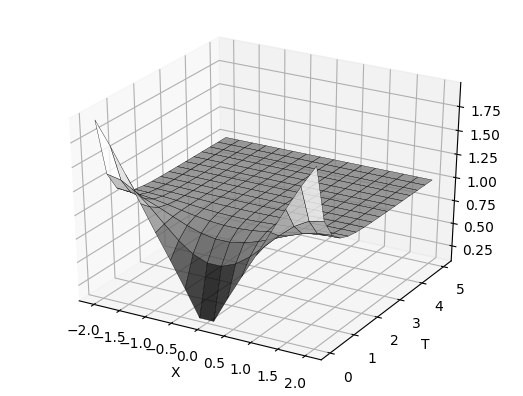

PyObject <matplotlib.text.Text object at 0x0000000026176080>

In [28]:
plot_surface(X,T,z',rstride=1,edgecolors="k", cstride=1, cmap=ColorMap("gray"), 
alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("T")

### Numeričko računanje i crtanje

Pogledajmo interaktivno konvergenciju - treba nam paket `Interact.jl`:

In [29]:
using Interact

In [30]:
# Definirajmo prostor točaka (Julia nema funkciju meshgrid(), ovo je zamjena)
X=linspace(-2,2)
T=linspace(0,5)
m=length(X)
gridX=repmat(X,1,m)
gridT=repmat(T',m,1)

50×50 Array{Float64,2}:
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 ⋮                                  ⋱                             

Interact.Slider{Int64}(5: "input-2" = 1 Int64 , "", 1, 1:10, "horizontal", true, "d", true)

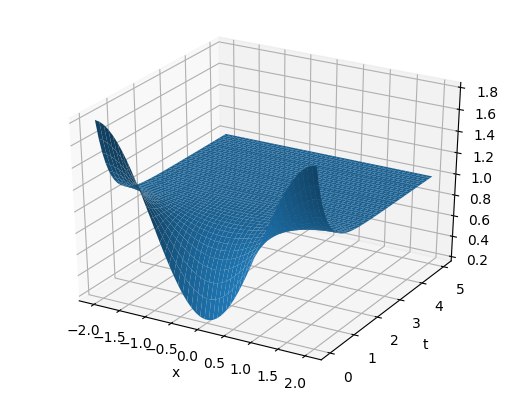

In [32]:
g=figure()
@manipulate for l in slider(1:10, value=1) ; withfig(g) do
        h=1-8*sum([cos.((2*k-1)*pi*gridX/2).*exp.(-(2*k-1)^2*pi^2*gridT/4)/((2*k-1)^2*π^2) 
                for k=1:l])
        surf(X,T,h') # ili surf(h)
        xlabel("x")
        ylabel("t")
    end
end

## Primjer 1

\begin{align*}
& u_t-u_{xx}=-u \\
& u(x,0)=f(x)=\begin{cases}0, \quad -1<x<0 \\ x,\quad 0<x<1 \end{cases} \\
& u(-1,t)=0,\quad u(1,t)=0 
\end{align*}

Za detalje o simboličkom računanju pogledajte
[SymPy Tutorial](https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md).

Uvrštavanjem 

$$
u(x,t)=X(x)T(t)
$$

imamo jednadžbu 

$$
T'X-TX''=-TX,
$$

odnosno dvije jednadžbe

$$
\frac{X''}{X}=\frac{T'+T}{T}=-\lambda.
$$

Jednadžba po $T$ je populacijska jednadžba koja glasi

$$
T'=-(\lambda+1)T
$$

i čije rješenje je

$$
T=Ce^{-(\lambda+1)t}.
$$

Riješimo SLP po $X$:

$$
X''=-\lambda X, \quad X(-1)=0, \quad X(1)=0.
$$

In [33]:
F = SymFunction("F")

F

In [34]:
l=symbols("l",real=true,positive=true)
diffeq = Eq(diff(F(x), x, x) +l*F(x), 0)

           2          
          d           
l*F(x) + ---(F(x)) = 0
           2          
         dx           

In [35]:
ex = dsolve(diffeq)

             /  ___  \         /  ___  \
F(x) = C1*sin\\/ l *x/ + C2*cos\\/ l *x/

In [36]:
ex1 = rhs(ex)

      /  ___  \         /  ___  \
C1*sin\\/ l *x/ + C2*cos\\/ l *x/

Uvrstimo rubne uvjete:

In [37]:
ex1a=subs(ex1,x,-1)

        /  ___\         /  ___\
- C1*sin\\/ l / + C2*cos\\/ l /

In [38]:
ex1b=subs(ex1,x,1)

      /  ___\         /  ___\
C1*sin\\/ l / + C2*cos\\/ l /

In [40]:
solve(cos(sqrt(l)),l)

2-element Array{SymPy.Sym,1}:
   pi^2/4
 9*pi^2/4

Sustav jednadžbi je homogen i glasi

$$
\begin{bmatrix} -C_1 & C_2 \\ C_1 & C_2 \end{bmatrix} \begin{bmatrix}\sin \sqrt{\lambda} \\ \cos\sqrt{\lambda} \end{bmatrix} = \begin{bmatrix} 0\\ 0\end{bmatrix}.
$$

Trivijalno rješenje je u ovom slučaju očito nemoguće, a netrivijalna rješenje postoje kada je 
matrica sustava singularna, odnosno kada je $C_1=0$ ili $C_2=0$.

Kada je $C_1=0$ onda je $\cos\sqrt{\lambda}=0$ pa je 

$$
\sqrt{\lambda}=\frac{2n+1}{2}\pi, \quad n=0,1,2,3,\ldots
$$

Kada je $C_2=0$ onda je $\sin\sqrt{\lambda}=0$ pa je 

$$
\sqrt{\lambda}=n\pi, \quad n=0,1,2,3,\ldots
$$

Dakle, rješenje problema koje zadovoljava jednadžbu i rubne uvjete ima oblik:

\begin{equation*}
u(x,t)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)
e^{-\big(\big[\frac{2n+1}{2}\pi\big]^2+1\big)t}
+b_n \sin (n\pi x)\,e^{-([n\pi]^2+1)t}.
\end{equation*}

Potrebno zadovoljiti još početni uvjet:

\begin{equation*}
u(x,0)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)
+b_n \sin (n\pi x)=f(x).
\end{equation*}
 
Radi se o razvoju u generalizirani Fourierov red funkcije f(x): 

In [41]:
p=piecewise((0,Lt(x,0)),(x,Ge(x,0)))

/0  for x < 0 
<             
\x  for x >= 0

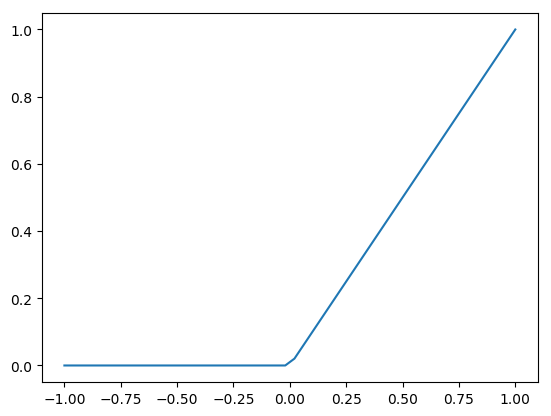

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000028EBAF98>

In [42]:
xx=linspace(-1,1)
y=[p(xx[i]) for i=1:length(xx)]
plot(xx,y)

Izračunajmo koeficijente $a_n$, $b_n$:

In [43]:
a(n)=⋅(p(x),cos((2*n+1)*PI*x/2),-1,1)/⋅(cos((2*n+1)*PI*x/2),cos((2*n+1)*PI*x/2),-1,1)

a (generic function with 1 method)

In [44]:
a(0)

   4    2 
- --- + --
    2   pi
  pi      

In [45]:
N(a(0))

0.23133503779823025

In [46]:
# Provjerimo ortonormiranost
integrate(x->cos((2*n+1)*pi*x/2)^2,-1,1)

1

In [47]:
integrate(x->sin(n*pi*x)^2,-1,1)

/0  for pi*n = 0
<               
\1   otherwise  

In [48]:
b(n)=⋅(p(x),sin(n*PI*x),-1,1) # /⋅(sin(n*PI*x),sin(n*PI*x),-1,1)

b (generic function with 1 method)

In [49]:
b(0)

0

In [50]:
b(1)

1 
--
pi

In [51]:
X=linspace(-1,1)
T=linspace(0,5)
m=length(X)
gridX=repmat(X,1,m)
gridT=repmat(T',m,1);

Interact.Options{:SelectionSlider,Int64}(9: "input-3" = 10 Int64 , "l", 10, "10", 10, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(18=>"18",2=>"2",16=>"16",11=>"11",7=>"7",9=>"9",10=>"10",19=>"19",17=>"17",8=>"8"…)), Any[], Any[], true, "horizontal")

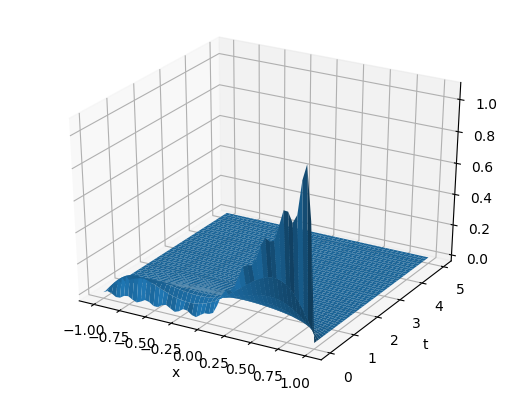

In [52]:
g=figure()
@manipulate for l=1:20; withfig(g) do
        h=sum([N(a(k))*cos.((2*k+1)*pi*gridX/2).*exp.(-(((2*k+1)*pi/2)^2/4+1)*gridT)+
                N(b(k))*sin.(k*pi*gridX).*exp.(-((k*pi)^2+1)*gridT) for k=0:l]) 
        surf(X,T,h') # ili surf(h)
        xlabel("x")
        ylabel("t")
    end
end

## Homogenizacija

U oba prethodna primjera zadani su homogeni rubni uvjeti. Ukoliko rubni uvjeti nisu homogeni, zadani problem je potrebno __homogenizirati__ kako bi mogli dobiti regularni SLP.

Navedimo primjer. Neka je zadan problem

\begin{align*}
& u_t -u_{xx}=0,\quad 0<x<l,\quad t>0 \\
& u(x,0)=f(x),\quad 0<x<l \\
& u(0,t)=g(t),\quad u(l,t)=h(t),\quad t>0.
\end{align*}
 
Nađimo rješenje u obliku

$$
u(x,t)=v(x,t)+U(x,t),
$$

gdje je $v$ rješenje problema sa homogenim rubnim uvjetima. Vrijedi

\begin{align*}
& u=v+U\\
& u_t=v_t+U_t\\
& u_{xx}=v_{xx}+U_{xx}
\end{align*}

pa zadana PDJ prelazi u 

$$
v_t+U_t=v_{xx}+U_{xx}.
$$

Početni uvjet za $v$ glasi

$$
v(x,0)=u(x,0)-U(x,0)=f(x)-U(x,0),
$$

a rubni uvjeti glase

\begin{align*}
& v(0,t)=u(0,t)-U(0,t)=g(t)-U(0,t)=0\quad  \textrm{(želimo homogeni uvjet)}\\
& v(l,t)=u(l,t)-U(l,t)=h(t)-U(l,t)=0 \quad  \textrm{(želimo homogeni uvjet)}
\end{align*}

Zaključujemo da će $v$ zadovoljavati homogene rubne uvjete ako je 

$$
U(x,t)=g(t)+\displaystyle\frac{x}{l}[h(t)-g(t)],\quad 0<x<l.
$$

Za ovako definiranu funkciju $U$ vrijedi

\begin{align*}
& U_t=g'(t)+\displaystyle\frac{x}{l}[h'(t)-g'(t)]\\
& U_{xx}=0.
\end{align*}

Uvrštavanjem slijedi da je $v$ rješenje _homogenog_ reakcijsko-difuzijskog problema

\begin{align*}
&v_t=v_{xx}-g'(t)-\displaystyle\frac{x}{l}[h'(t)-g'(t)], \quad 0<x<l,\quad t>0
\\
&v(x,0)=f(x)-g(0)-\displaystyle\frac{x}{l}[h(0)-g(0)], \quad 0<x<l
\\
& v(0,t)=0,\quad v(l,t)=0,\quad t>0,
\end{align*}

dok je rješenje polaznog problema

$$
u(x,t)=v(x,t)+g(t)+\displaystyle\frac{x}{l}[h(t)-g(t)].
$$